# Portfolio Optimzation


Building a portfolio optimization for Exchange - Traded Fund such as VOO, VUG, VIG, VXF, VB, VEA and VWO to determine which investment has the maxium return and minimum risk using Pandas, Seaborn and Matplotlib. I will provide quick visuals to show the comparison between these stocks from 01-01-2017 to today. 

# Import data

In [46]:
#Import the python libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import yfinance as yf

In [47]:
#Get stock tickers in the porfolio 
assets = ['VOO','VUG','VIG','VXF','VB','VEA','VWO']

In [48]:
StartDate = '2017-01-01'

In [42]:
today = datetime.today().strftime('%Y-%m-%d')
today

'2023-03-11'

In [43]:
#Create a dataframe to store the adjusted close price of the stocks 
df = pd.DataFrame()
for stock in assets:
    df[stock]= yf.download(stock, start = StartDate, end =today)['Adj Close']
df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,VOO,VUG,VIG,VXF,VB,VEA,VWO
Date,,,,,,,
2017-01-03,185.714752,106.255943,76.223854,89.294487,118.995117,30.811951,30.438515
2017-01-04,186.810684,107.145508,76.562759,90.867706,120.985878,31.189037,30.716221
2017-01-05,186.666946,107.363167,76.446815,90.173645,120.022606,31.465559,31.036020
2017-01-06,187.394562,108.177025,76.830307,90.173645,119.857468,31.339872,30.909779
2017-01-09,186.801682,108.139168,76.455742,89.646149,119.141884,31.264452,30.859289


multiple_EFT_retur9-=0

# Covariance and Correlation Matrix

In [44]:
#Covariance and Correlation matrix 
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,VOO,VUG,VIG,VXF,VB,VEA,VWO
VOO,0.000160,0.000178,0.000140,0.000177,0.000171,0.000131,0.000128
VUG,0.000178,0.000215,0.000149,0.000200,0.000185,0.000141,0.000144
VIG,0.000140,0.000149,0.000131,0.000151,0.000149,0.000115,0.000107
VXF,0.000177,0.000200,0.000151,0.000232,0.000219,0.000152,0.000151
VB,0.000171,0.000185,0.000149,0.000219,0.000215,0.000149,0.000144
VEA,0.000131,0.000141,0.000115,0.000152,0.000149,0.000136,0.000129
VWO,0.000128,0.000144,0.000107,0.000151,0.000144,0.000129,0.000172


In [14]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,VOO,VUG,VIG,VXF,VB,VEA,VWO
VOO,1.000000,0.956579,0.967300,0.916047,0.921031,0.887756,0.769022
VUG,0.956579,1.000000,0.884835,0.896841,0.862444,0.824134,0.747899
VIG,0.967300,0.884835,1.000000,0.864524,0.889859,0.858630,0.711082
VXF,0.916047,0.896841,0.864524,1.000000,0.984033,0.855257,0.756439
VB,0.921031,0.862444,0.889859,0.984033,1.000000,0.871084,0.749665
VEA,0.887756,0.824134,0.858630,0.855257,0.871084,1.000000,0.847071
VWO,0.769022,0.747899,0.711082,0.756439,0.749665,0.847071,1.000000


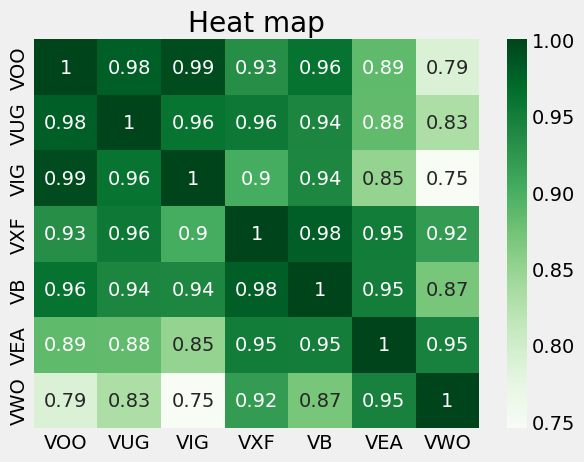

In [18]:
import seaborn as sns 
sns.heatmap(df.corr(), cmap ='Greens', annot = True)
plt.title('Heat map')
plt.show()

As you see in the matrix above, an asset always has a perfectly positive correlation of 1 with itself. 

# Portfolio Variance

In [21]:
#Randomly weighted porfolio's variance 
w={'VOO':0.1, 'VUG':0.2, 'VIG':0.2, 'VXF':0.1, 'VB':0.1,'VEA':0.2, 'VWO':0.1}
port_var = cov_matrix.mul(w, axis =0).mul(w, axis=1).sum().sum()
port_var

0.0001517482202232126

I picked the random list iof weights for all 4 assets and founnd the portfolio variance = 0.00015

# Portfolio Expected Returns

In [22]:
#Yearly returns for individual companies 
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

VOO    0.099960
VUG    0.130121
VIG    0.094911
VXF    0.075734
VB     0.074043
VEA    0.032201
VWO    0.011556
dtype: float64

In [23]:
#Portfolio returns 
w=[0.1,0.2,0.2,0.1,0.1,0.2,0.1]
port_er = (w*ind_er).sum()
port_er

0.07757591689415666

# Plotting the efficient frontier

In [24]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

VOO    0.200193
VUG    0.232043
VIG    0.181178
VXF    0.240198
VB     0.231243
VEA    0.184376
VWO    0.207257
dtype: float64

In [25]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
VOO,0.099960,0.200193
VUG,0.130121,0.232043
VIG,0.094911,0.181178
VXF,0.075734,0.240198
VB,0.074043,0.231243
VEA,0.032201,0.184376
VWO,0.011556,0.207257


VXF has the maximum risk with average return rates while VUG has the maximum return and maximum risk.

In [27]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [28]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [29]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [49]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,VOO weight,VUG weight,VIG weight,VXF weight,VB weight,VEA weight,VWO weight
0,0.076064,0.202325,0.115912,0.241047,0.068045,0.113235,0.174813,0.088067,0.198881
1,0.094136,0.200987,0.309340,0.269230,0.168671,0.053894,0.086241,0.019598,0.093026
2,0.081808,0.214912,0.032765,0.251973,0.046305,0.250943,0.276938,0.010183,0.130893
3,0.082513,0.194811,0.215634,0.178798,0.219058,0.110311,0.047118,0.116828,0.112254
4,0.070357,0.192551,0.189806,0.015189,0.220832,0.189956,0.077912,0.230273,0.076033


There are differnt weights, returns and volatility in the portfolio. Plotting the returns and viotility from this dataframe will give us the efficient frontier 

<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

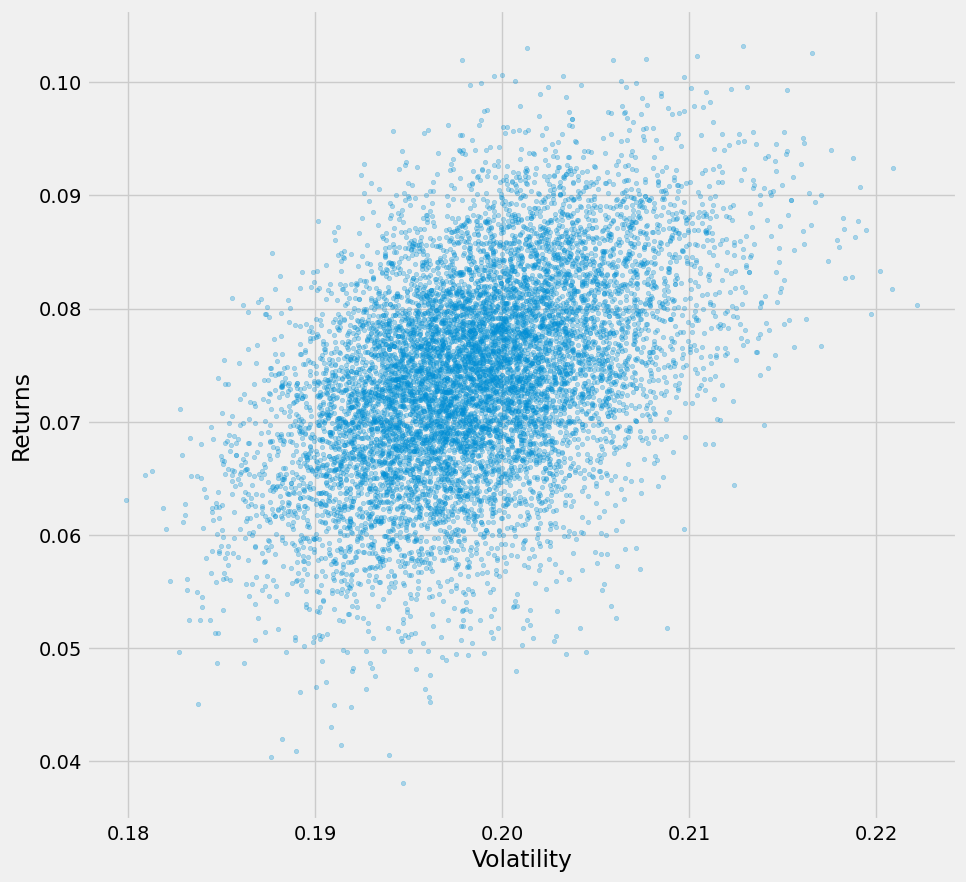

In [50]:
#Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [32]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns       0.063112
Volatility    0.179913
VOO weight    0.064593
VUG weight    0.062004
VIG weight    0.363954
VXF weight    0.003067
VB weight     0.020608
VEA weight    0.323168
VWO weight    0.162607
Name: 8717, dtype: float64

The minimum volatility is where the weight of VOO = 6.4%, VUG = 6.2%, VIG = 3.6%, VXF = 0.3%, VB = 2%, VEA = 3.2% and VWO = 1.6% which wiill show in the graph below

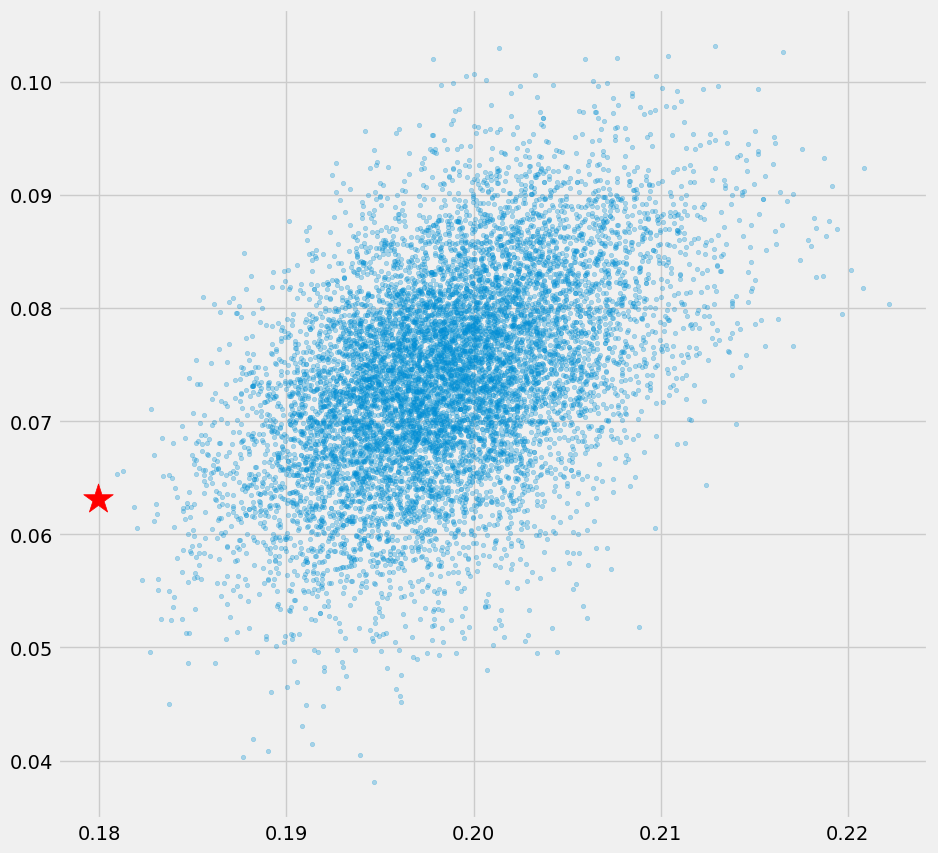

In [33]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

The red star denotes the most efficient porfolio with minimum volatility.


In [34]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns       0.102002
Volatility    0.197858
VOO weight    0.289453
VUG weight    0.306815
VIG weight    0.303934
VXF weight    0.002750
VB weight     0.026990
VEA weight    0.062089
VWO weight    0.007970
Name: 6809, dtype: float64

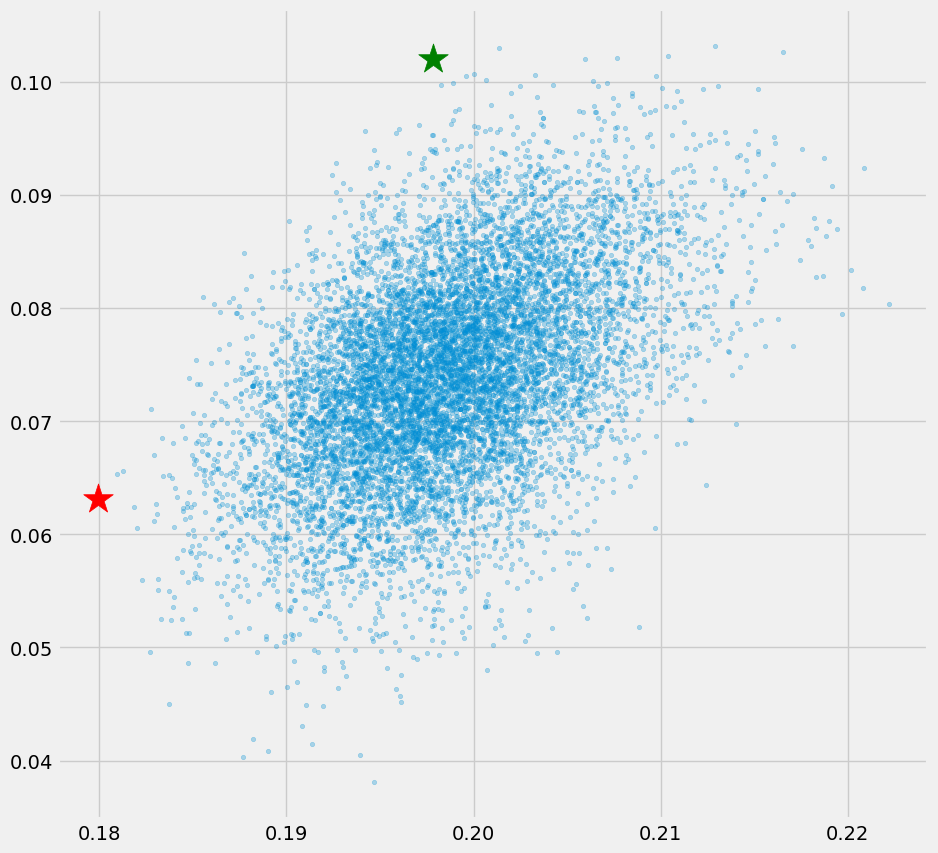

In [45]:
## Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

The green star indicates the optimal portfolio